In [14]:
import matplotlib.pyplot as plt
import numpy as np

# PART 1: Lagrange  interpolation and Runge phenomenon

The aim here is to show Runge's phenomenon for the polynomial interpolation. We are going to implement an algorithm that is linear in the number of nodes.

Let $f: [a,b] \to \mathbb{R}$ a function and $x_0,\cdots,x_n$ in $[a,b]$. We recall that the Lagrange polynomial $P_n$ is given by the following formula
$$ P_n(x)  = f(x_0) + \sum_{k=1}^n f[x_0,\cdots,x_k] (x-x_0)\cdots(x-x_{k-1}),$$
where
$$
 f[x_j,x_{j+1},\cdots,x_k] = \frac{f[x_{j+1},\cdots,x_{k}] - f[x_j,\cdots,
      x_{k-1}]}{x_k - x_j}
      \quad \mbox{and}\quad f[x_j]=f(x_j).
$$
The goal is to implement the evaluation of $P_n$ using this formula in $O(n)$ operations.


## 1) Evaluation of a polynomial in the Newton basis
Given a family of real numbers $x_0 <x_1\cdots < x_{n-1}$, one consider the polynomial $P$ over the form
 $$P(x) = a_0 + a_1 (x - x_0) + a_2 (x - x_0) (x - x_1) + \cdots + a_n (x - x_0) \cdots
  (x - x_{n-1}).$$
  Write a function $\textit{lagrange_newton}$ that associates to two lists of real numbers $(x_i)$, $(a_i)$ and a real  $x$ the value $P(x)$ (and such that the number of operations is in  $\mathrm{O}(n)$).


In [15]:
# Attention size(A) = size(X) (but we don't use le last element of X : X(n-1))
def lagrange_newton(A,X,x):
    result, step = A[0], 1
    for i in range(1,len(A)):
        step = step*(x-X[i-1])
        result += A[i]*step
    return result

## 2) Evaluation of the Newton coefficients

Write a function $\textit{coef_newton}$ that associates to $X=(x_0,\cdots,x_n)$ and $F=(f(x_0),\cdots,f(x_n))$ the coefficients of the Lagrange polynomial in the basis
$$\Big( (x-x_0)\cdots (x-x_{k}) \Big)_{0\leq k \leq n-1}.$$

In [16]:
# It returns size(Coef) = size(X)
def coef_newton(X,F):
    n = len(X)
    s = (n,n)
    A = np.zeros(s)
    Coef = np.zeros(n)

# putting values of f[x_i] = f(x_i) on the diagonal of the matrix A
    for i in range(n):
        A[i][i] = F[i]

# calculating values of the upper triangular part of the matrix.
    for j in range(1, n):
        for i in range(j - 1, -1, -1):
            A[i][j] = ((A[i+1][j] - A[i][j - 1]) /
                                     (X[j] - X[i]));
# the first row contains the values of f[x_0, x_1, ..., f[x_k]], which are used in Lagrange polynomial
    for i in range(n):
        Coef[i] = A[0][i]

    return Coef

## 3) Lagrange polynomial evaluation

Write a function $\textit{lagrange_polynomial}$ that calculates the Lagrange polynomial on $X,F$.

In [17]:
def lagrange_polynomial(X,F,x):
    A = coef_newton(X,F)
    Lagx = lagrange_newton(A,X,x)
    return Lagx

## 4) Exemple 1 : sinus

Plot the Lagrange polynomial for the function $\sin$ for $n=3,5,10$. What do you observe ?

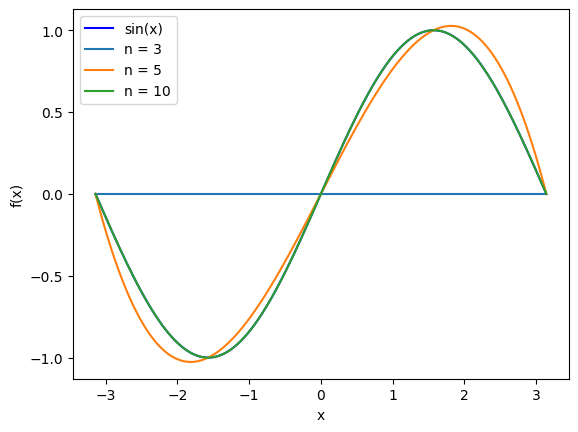

In [18]:
num = [3,5,10]

#  plot of sinus curve
x = np.linspace(-np.pi,np.pi,500)
f = np.sin(x)
plt.plot(x,f,'b',label = "sin(x)")

# Array of results
results = []

# calculating the approximation for each of n
for i in num:
    X = np.linspace(-np.pi,np.pi,i)
    F = [np.sin(j) for j in X]
    res = lagrange_polynomial(X,F,x)
    results.append(res)

#plot approximations
for i in range(len(num)):
    plt.plot(x, results[i], label = "n = " + str(num[i]))
plt.legend()
plt.ylabel('f(x)')
plt.xlabel('x')
plt.show()

## 5) Example 2 : the square function

Plot the Lagrange polynomial and and the square function for $n=2,3,5$. What do you observe ?

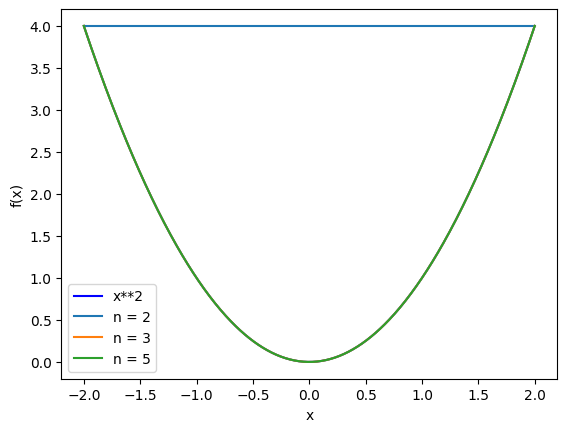

In [19]:
num = [2,3,5]

#  plot the square function
x = np.linspace(-2,2,500)
f = x**2
plt.plot(x,f,'b',label = "x**2")

# Array of results
results = []

# calculating the approximation for each of n
for i in num:
    X = np.linspace(-2,2,i)
    F = [i**2 for i in X]
    res = lagrange_polynomial(X,F,x)
    results.append(res)

#plot approximations
for i in range(len(num)):
    plt.plot(x, results[i], label = "n = " + str(num[i]))
plt.legend()
plt.ylabel('f(x)')
plt.xlabel('x')
plt.show()

## 6) Example 3. Runge phenomenon

Plot the Lagrange polynomial the function $f(x)=1/(1+25x^2)$ for $n=5,10,13$. What do you observe ?


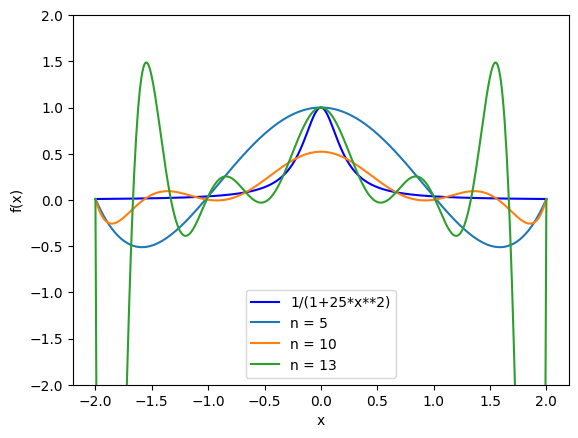

In [20]:
num = [5,10,13]

#  plot the function 1/(1 + 25x**2)
x = np.linspace(-2,2,500)
f = 1/(1+25*x**2)
plt.plot(x,f,'b',label = "1/(1+25*x**2)")

# Array of results
results = []

# calculating the approximation for each of n
for i in num:
    X = np.linspace(-2,2,i)
    F = [1/(1+25*i**2) for i in X]
    res = lagrange_polynomial(X,F,x)
    results.append(res)

#plot approximations
for i in range(len(num)):
    plt.plot(x, results[i], label = "n = " + str(num[i]))
plt.legend()
plt.ylim(-2,2)
plt.ylabel('f(x)')
plt.xlabel('x')
plt.show()

# PART 2: Hermite Interpolation
The goal of this part is to provide a function $\textit{hermite}$ that interpolates both points and tangents.
### 1) First define the functions $h_0$, $h_1$, $h_2$ and $h_3$ from $[0,1]$ to $\mathbb{R}$

In [21]:
def h0(x):
  return (1 - 3*x**2 + 2*x**3)

In [22]:
def h1(x):
  return (3*x**2 - 2*x**3)

In [23]:
def h2(x):
  return (x - 2*x**2 + x**3)

In [24]:
def h3(x):
  return (-x**2 + x**3)

### 2) Define a function $\textit{hermite}(Points,Vectors,Parameters,t)$.
Here Points and Vectors are $2*n$ arrays, Parameter is a $1*n$ array and $t$ is a real number. The functions returns the evaluation at the parameter $t$.

In [25]:
def hermite(Points, Vectors, Parameters, t):
    # Determine the number of components (dimensions)
    num_components = len(Points)

    # Pre-allocate results as a list of arrays, each of size len(t)
    results = [np.zeros(len(t)) for _ in range(num_components)]

    for j in range(len(Parameters)-1):
      h = Parameters[j+1] - Parameters[j]
      for i in range(len(t)):
        if Parameters[j] <= t[i] and t[i] <= Parameters[j+1]:
          omega = (t[i] - Parameters[j]) / h
          for k in range(num_components):
              results[k][i] = h0(omega) * Points[k][j] + h1(omega) * Points[k][j+1] + h2(omega) * Vectors[k][j] * h + h3(omega) * Vectors[k][j+1] * h

    return results

### 3) Example with the function $x\mapsto 1/(1+25*x^2)$

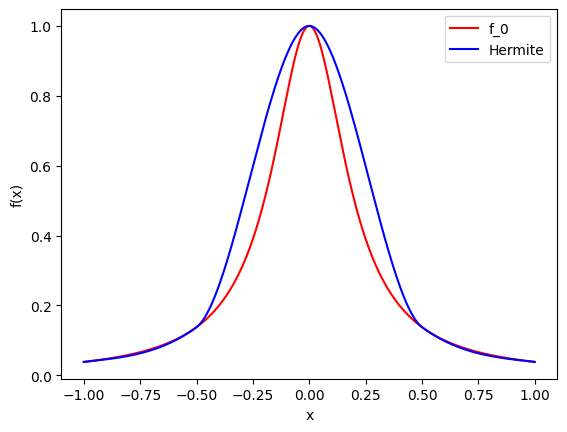

In [26]:
n = 5
# Define Points, Vectors and Parameters for the function x->1/(1+25x*x)

Parameters = np.linspace(-1,1,n)# les noeuds
Points = np.zeros((2,len(Parameters)))
Points[0,:] = np.array(Parameters)
Points[1,:] = 1/(1+25*Parameters**2)# les valeurs aux noeuds
Vectors = np.ones((2,len(Parameters)))

Vectors[1,:] = -50*Parameters / ((1+25*Parameters**2)**2)

# Plot the function x->1/(1+25x*x)
x = np.linspace(-1,1,500)
f = 1/(1+25*x*x)
plt.plot(x,f,'r',label = "f_0")

# Plot the hermite spline associated to Points, Vectors and Parameters

approx = hermite(Points,Vectors,Parameters,x)

plt.plot(approx[0],approx[1],'b',label = "Hermite")
plt.legend()
plt.ylabel('f(x)')
plt.xlabel('x')
plt.show()